In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import math as mt

from IPython.display import clear_output
from src import spotify, dp, utils, DB

db = DB()

## 사용자 메일 박스 조회

In [3]:
mail_box_id = "623fd87941b77810641388aa"

tracks = db.get_mail_box(mail_box_id)
tracks.head()

,id,name,artists,artists_name
0,7zDu3l7DDlfSlt20YMKkWo,Martini Blue,0siBQaURCli5wn2lqv8WZg,DPR LIVE
1,4LkXtklCusSbi6UxYWgH8B,Scaredy Cat,2o8gT0fQmFxGNbowbdgeZe,DPR IAN
2,2PcJoVkfjcbvoqBxV1Nj7y,All I Wanna Do,4XDi67ZENZcbfKnvMnTYsI,Jay Park


## 사용자에게 추천된 음악 확인

In [4]:
reco_tracks = db.get_mail(mail_box_id)
reco_tracks.head()

,id,name,artists,artists_name
0,1zIvvyjousJTxkumkCDnlo,BOLO,1MAUqH0haKBYbjpknTfreY,PENOMECO
1,1a1LrfgkTvfHFykIxcv8WU,Cherry Wine,73BLwSX6gsNeVzS7DgI4xe,grentperez
2,6nSHtgTH5a959xPucs6Ilb,HANGANG,7lXgbtBDcCRbfc5f8FhGUL,Hoody
3,08WPvDEsHvTFuB9w8tC2OS,Now and Later,6d47Z08T4snK50HgTEHo5Z,Sage The Gemini
4,2rbfCOgXMPoBLBrK2wLX5K,Chocolate,5TnQc2N1iKlFjYD7CPGvFc,DAY6


## 사용자가 맘에 들었던 음악 Select (Random 하게)

In [5]:
sel_tracks = reco_tracks.sample(n=mt.floor(len(reco_tracks) * 0.075))
db.new_mail_box_seed(mail_box_id, sel_tracks)

sel_tracks.head()

,id,name,artists,artists_name
25,15LVXIWDmQA7mLUnLJn1AF,D-day (Feat. GIRIBOY),7lXgbtBDcCRbfc5f8FhGUL,Hoody
0,1zIvvyjousJTxkumkCDnlo,BOLO,1MAUqH0haKBYbjpknTfreY,PENOMECO
21,0afkEmqKAiVYI6aMsNhkR6,candy choppa,"4qcKNkdxUidhvUByB2eQ6g,1qIVbNaFEyJ73CX72RM9Ts","Warren Hue,Chasu"
49,7xgHy510SVkSgV1ZpzElW1,Boom,0siBQaURCli5wn2lqv8WZg,DPR LIVE


## 재추천

In [6]:
# 1. Get Token
token = spotify.get_token()

genres = spotify.get_genres(token, sel_tracks)

og_features = spotify.get_features(token, tracks)
reply_features = spotify.get_features(token, sel_tracks)
db.observe_seed_zone(reply_features)

In [7]:
recos = spotify.get_recommend(sel_tracks,reply_features, genres, token,
                             og=tracks)
reco_features = spotify.get_features(token, recos)
reco_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0NsOzFVBBphYwa0Qb5pLYu,0.780,0.788,5,-5.633,0.0615,0.0946,0.000000,0.0608,0.683,129.942
1,7hR5toSPEgwFZ78jfHdANM,0.681,0.593,5,-9.327,0.0251,0.4350,0.000117,0.1060,0.731,115.058
2,5BVjsCcDlYgJG2bB2jsOeI,0.670,0.532,5,-4.661,0.2540,0.5530,0.000349,0.0956,0.718,159.948
3,1mea3bSkSGXuIRvnydlB5b,0.486,0.617,5,-7.115,0.0287,0.0954,0.000003,0.1090,0.417,138.015
4,6e2LjOQ7SyZuYIOGeZlIkh,0.840,0.761,5,-5.155,0.0871,0.3450,0.000000,0.1220,0.619,129.956


In [8]:
# 합치기
sel_tracks = pd.concat([tracks,sel_tracks], ignore_index=True)
features = pd.concat([og_features, reply_features], ignore_index=True)

features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7zDu3l7DDlfSlt20YMKkWo,0.767,0.551,11,-6.654,0.1180,0.395,0.000000,0.1300,0.881,139.937
1,4LkXtklCusSbi6UxYWgH8B,0.801,0.686,5,-4.252,0.0414,0.133,0.000000,0.0882,0.885,120.007
2,2PcJoVkfjcbvoqBxV1Nj7y,0.613,0.668,8,-6.867,0.2670,0.245,0.000000,0.0735,0.509,96.176
3,15LVXIWDmQA7mLUnLJn1AF,0.717,0.561,5,-4.870,0.0376,0.401,0.000074,0.1140,0.732,143.045
4,1zIvvyjousJTxkumkCDnlo,0.740,0.669,11,-5.702,0.0760,0.361,0.000022,0.1750,0.922,103.025


In [9]:
norm_features = dp.make_norm(features, reco_features)

norm_features.head()

,id,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,7zDu3l7DDlfSlt20YMKkWo,0.666105,0.477027,1.000000,0.713871,0.212900,0.447328,0.000000,0.130844,0.899522,0.643909
1,4LkXtklCusSbi6UxYWgH8B,0.723440,0.659459,0.454545,0.865522,0.040144,0.150607,0.000000,0.074691,0.904306,0.461564
2,2PcJoVkfjcbvoqBxV1Nj7y,0.406408,0.635135,0.727273,0.700423,0.548940,0.277449,0.000000,0.054944,0.454545,0.243527
3,15LVXIWDmQA7mLUnLJn1AF,0.581788,0.490541,0.454545,0.826504,0.031574,0.454123,0.000132,0.109350,0.721292,0.672345
4,1zIvvyjousJTxkumkCDnlo,0.620573,0.636486,1.000000,0.773976,0.118178,0.408822,0.000039,0.191295,0.948565,0.306190


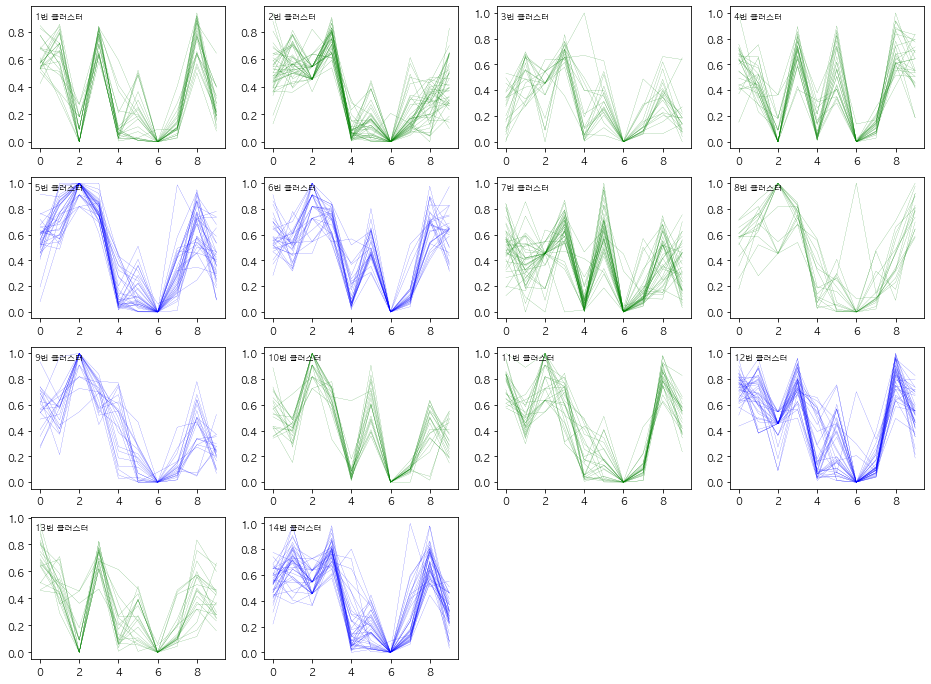

In [10]:
kmeans = utils.KMeans(
    datas=norm_features
)
kmeans.run(early_stop_cnt=5)
clear_output(wait=True)

utils.visual_cluster_data(sel_tracks, kmeans)
_filtering_music_list = dp.music_filtering(sel_tracks, kmeans)

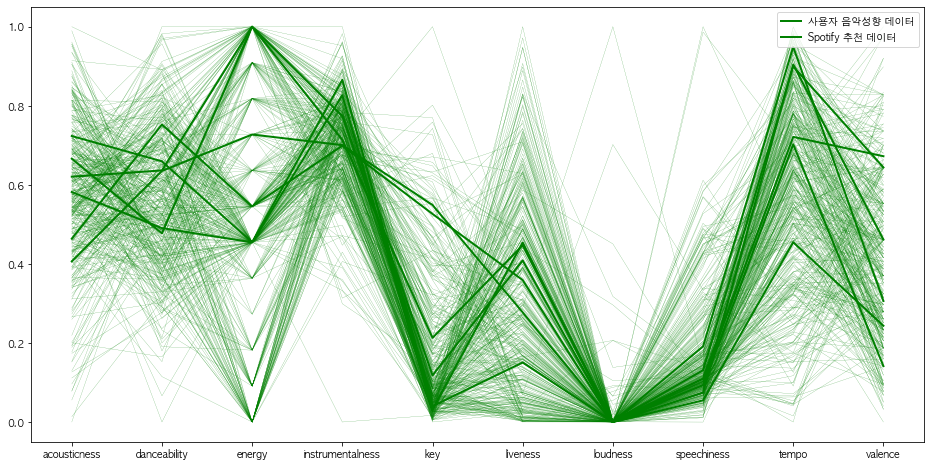

In [11]:
utils.visual_norm_data(sel_tracks, norm_features)

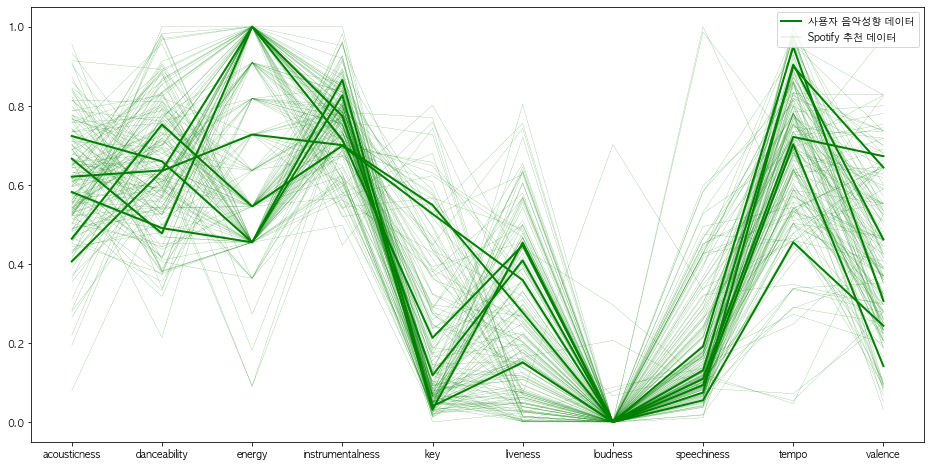

,id,name,artists,artists_name
0,0NsOzFVBBphYwa0Qb5pLYu,MYSELF (feat. george) (prod. APRO),6naXFodImN2DwRmKCQHAUt,SOLE
3,5BVjsCcDlYgJG2bB2jsOeI,Winter Blossom (Prod. by 0channel),5enwJ9yOnKlCP91ov4Dqhv,punchnello
5,6e2LjOQ7SyZuYIOGeZlIkh,DIE DIE (Feat. CHOILB) (STUDY GROUP X GIRIBOY),2MtHuR0W2idZdF7x4wddqq,GIRIBOY
6,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie
7,2p980qlVXYLh3HdHusbhfa,풀어,3eCd0TZrBPm2n9cDG6yWfF,DEAN


In [12]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

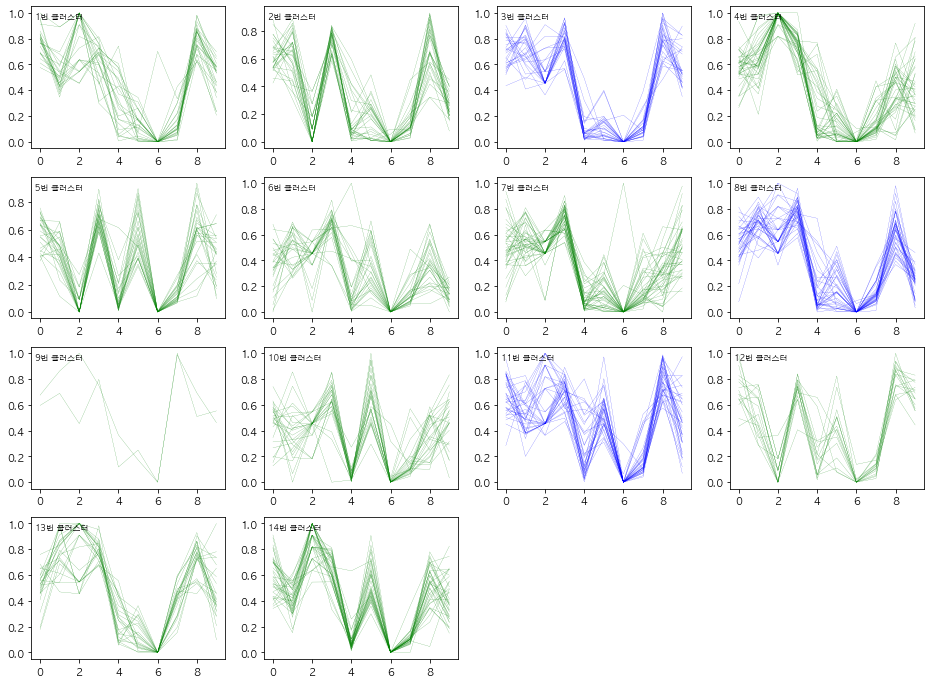

In [15]:
filter_music_list, kmeans = utils.reco_KMeans(norm_features, sel_tracks)

utils.visual_cluster_data(sel_tracks, kmeans)

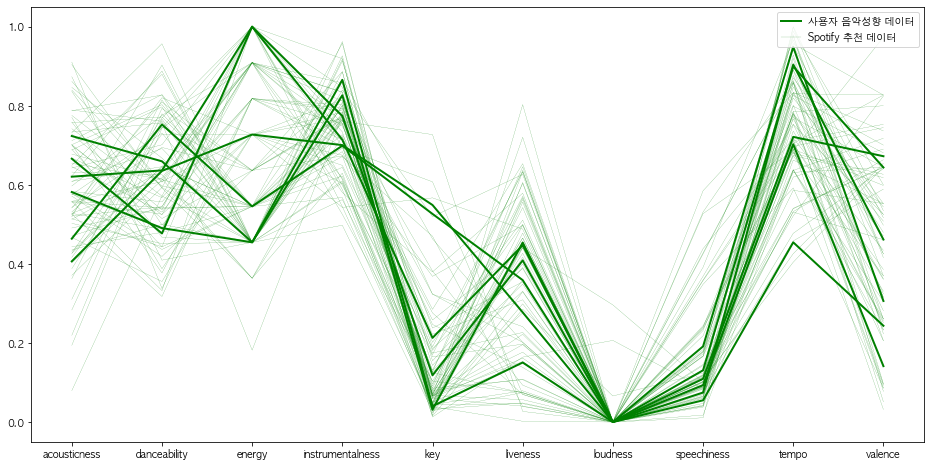

,id,name,artists,artists_name
0,0NsOzFVBBphYwa0Qb5pLYu,MYSELF (feat. george) (prod. APRO),6naXFodImN2DwRmKCQHAUt,SOLE
3,5BVjsCcDlYgJG2bB2jsOeI,Winter Blossom (Prod. by 0channel),5enwJ9yOnKlCP91ov4Dqhv,punchnello
5,6e2LjOQ7SyZuYIOGeZlIkh,DIE DIE (Feat. CHOILB) (STUDY GROUP X GIRIBOY),2MtHuR0W2idZdF7x4wddqq,GIRIBOY
6,1f5cbQtDrykjarZVrShaDI,Drowning (feat. Kodak Black),31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie
7,2p980qlVXYLh3HdHusbhfa,풀어,3eCd0TZrBPm2n9cDG6yWfF,DEAN


In [16]:
filter_music = norm_features.set_index("id").loc[_filtering_music_list].reset_index()
reco_musics = [_ in _filtering_music_list for _ in recos['id']]

utils.visual_norm_data(sel_tracks, filter_music)
recos[reco_musics].head()

In [17]:
db.new_mail(mail_box_id,
           recos[reco_musics])

In [18]:
genres

,artists,genres
0,7lXgbtBDcCRbfc5f8FhGUL,"chill,k-pop,pop"
1,1MAUqH0haKBYbjpknTfreY,"k-pop,pop,hip-hop"
2,4qcKNkdxUidhvUByB2eQ6g,chill
3,1qIVbNaFEyJ73CX72RM9Ts,r&b
4,0siBQaURCli5wn2lqv8WZg,"k-pop,pop"


In [19]:
spotify.get_genres(token,recos[reco_musics])

,artists,genres
0,6naXFodImN2DwRmKCQHAUt,"chill,k-pop"
1,5enwJ9yOnKlCP91ov4Dqhv,"k-pop,hip-hop"
2,2MtHuR0W2idZdF7x4wddqq,"k-pop,hip-hop"
3,31W5EY0aAly4Qieq6OFu6I,hip-hop
4,3eCd0TZrBPm2n9cDG6yWfF,"k-pop,pop"
5,0HXCe7R2f1Us5bAW7ohMC6,k-pop
6,2u7CP5T30c8ctenzXgEV1W,"k-pop,pop,hip-hop"
7,3e7awlrlDSwF3iM0WBjGMp,"pop,k-pop"
8,0hCNtLu0JehylgoiP8L4Gh,"pop,hip-hop"
9,5PDw41tArOne60p7F4vTtU,pop
